## Python Pizza Course 2019
# GeoTiffs


## Introduction
This notebook gives a small introduction to handling geotiffs in Python. Although one can use the `GDAL` module for this purpose, we advise to use the `rasterio` module.

A GeoTIFF is a picture (.tiff) with geographic (geo) information, so the array (which is what a picture is) has elements located on a map. Last but not least, the geographic information contains both coordinates, as how to interpret those coordinates (reference system).

In [1]:
import rasterio as rio
import pathlib

In [2]:
data_folder = pathlib.Path("data")
geotiff = data_folder / "beregeningstype.tif"

In [12]:
dataset = rio.open(geotiff)
%matplotlib inline

RasterIO provides the GeoTIFF as an object. This object has a number of bands (one or multiple), such as one for grayvalues, or three for RGB colors.

In [4]:
dataset.count # 1 band

1

Let's find out the size of the picture.

In [5]:
print("The picture has a width of {} and a height of {}".format(dataset.width, dataset.height))

The picture has a width of 1200 and a height of 1300


We only have opened the picture at the moment and no data has been read. Let's change that. Notice that the following operations is a `numpy` array, which you've learned about in a previous module.

In [8]:
dataset.read(1)

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]])

These are a lot of -9999. values. We assume this is nodata, but we can actually check it.

In [9]:
dataset.nodatavals

(-9999.0,)

This confirms our assumption, but let's check what the picture looks like by plotting it.

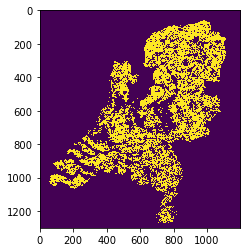

In [13]:
from matplotlib import pyplot as plt
plt.imshow(dataset.read(1), cmap='viridis')
plt.show()

This looks alright, but it's also plotting the nodata values. We can fix that by ignoring the nodata values, using `masked=True`, which gives us a masked numpy array. You read about that @ https://docs.scipy.org/doc/numpy/reference/maskedarray.generic.html#rationale

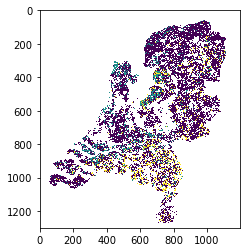

In [14]:
plt.imshow(dataset.read(1, masked=True), cmap='viridis')
plt.show()

Beautiful, but we're still missing our coordinates. Let's try to determine the coordinates of the (0,0) point and the (1200,1300) point.

In [15]:
print(dataset.transform * (0,0))  # upper left corner
print(dataset.transform * (dataset.width, dataset.height))  # bottom right corner

(0.0, 625000.0)
(300000.0, 300000.0)


In [16]:
dataset.bounds

BoundingBox(left=0.0, bottom=300000.0, right=300000.0, top=625000.0)

This seems like the Dutch coordinate system. Let's check.

In [17]:
dataset.crs

CRS.from_dict(init='epsg:28992')

Let's check the value at Utrecht

In [18]:
x, y = 133574, 455948  # Utrecht in RD New coordinates
i, j = dataset.index(x, y)
dataset.read(1)[i, j]

-9999.0

RasterIO is smart and can do all of the above for us already in plotting, by providing its own method.

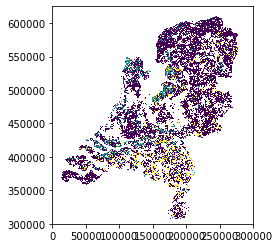

In [19]:
from rasterio.plot import show
show(dataset.read(1, masked=True), transform=dataset.transform)

Further plotting will be done in the visualisation pizza course.

## Further reading
https://rasterio.readthedocs.io/en/stable/
